In [1]:
import pandas as pd

df = pd.read_parquet("hf://datasets/seara/ru_go_emotions/raw/train-00000-of-00001-86de8ef1d0ae28df.parquet")


In [6]:
from collections import defaultdict
import matplotlib.pyplot as plt
class_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]

def plot_distribution(df, title):
    counts = df[class_labels].sum()
    counts.plot(kind='bar', figsize=(10, 6), title=title, rot=45)
    plt.ylabel("Count")
    plt.show()


# plot_histogram(data["train"])


In [13]:
df.drop(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear'], axis=1, inplace=True)

In [18]:
df = df[["ru_text", "anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]]

In [31]:
df = df[~(df[class_labels] == 0).all(axis=1)]

In [32]:
df.drop_duplicates()

,ru_text,anger,disgust,fear,joy,sadness,surprise,neutral
0,Эта игра причинила мне боль.,0,0,0,0,1,0,0
2,"Ты правильно поступаешь, если тебе все равно, ...",0,0,0,0,0,0,1
4,"[ИМЯ] не было рядом с ними, он был рядом с «Со...",0,0,0,0,0,0,1
10,"Да, и теперь, когда вы упомянули об этом, я ду...",0,0,0,0,0,0,1
12,НО ЭТО ОНА! /с,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
211205,Я только что звонил в полицию Капитолия. На ни...,0,1,0,0,0,0,0
211209,"АХ, ДА!!",0,0,0,0,0,0,1
211211,"погуглить, потому что меня тогда еще не было в...",0,0,0,0,0,0,1
211213,"Ух ты, она теперь хедлайнер двух шоу",0,0,0,0,0,0,1


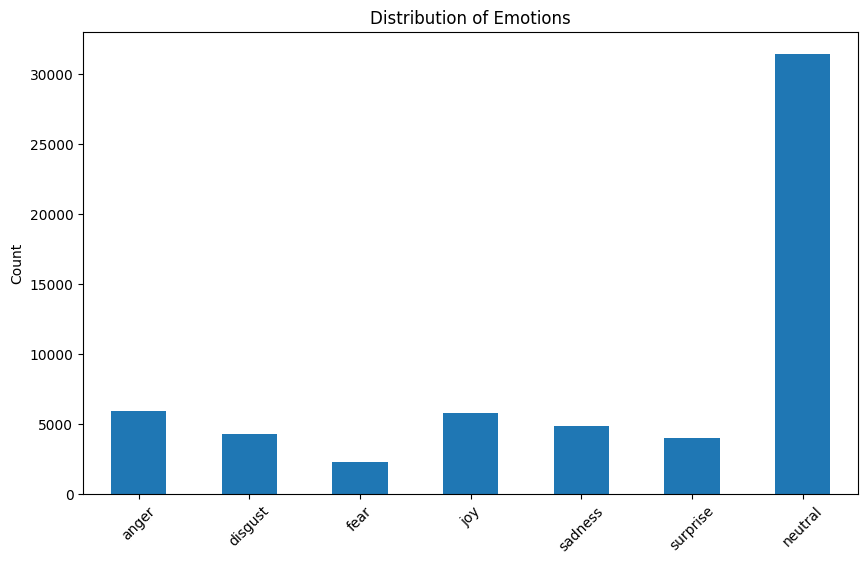

In [34]:
plot_distribution(df.drop_duplicates(), title="Distribution of Emotions")

In [43]:
filtered = df[~((df['joy'] == 1) | (df['neutral'] == 1))]

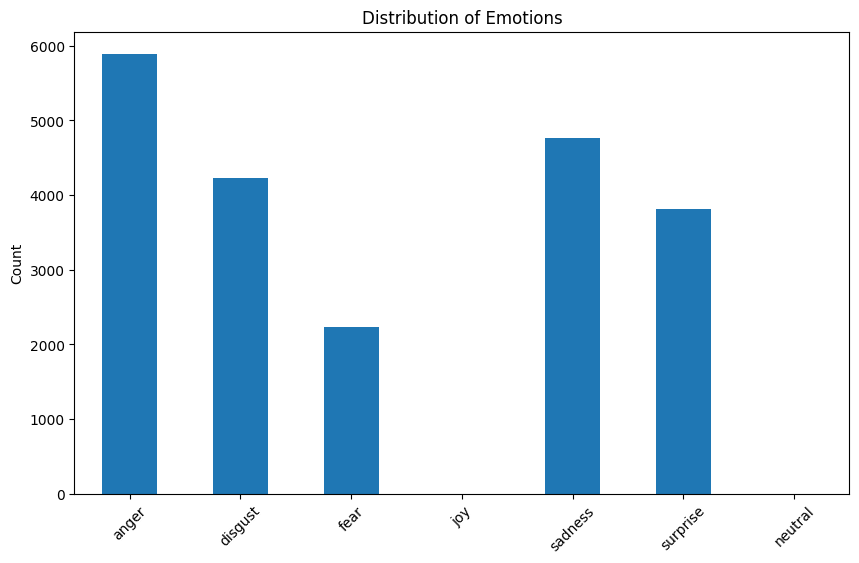

In [44]:
plot_distribution(filtered, title="Distribution of Emotions")

In [45]:
train = pd.read_csv('data/train.csv')
train

,text,anger,disgust,fear,joy,sadness,surprise,neutral
0,"Моя любимая еда — это все, что мне не приходил...",0,0,0,0,0,0,1
1,"Теперь, если он покончит с собой, все будут ду...",0,0,0,0,0,0,1
2,КАКОГО НАХРАНА БЭЙЛЕССКАЯ ИЗОИНЦИЯ?,1,0,0,0,0,0,0
3,Чтобы она почувствовала угрозу,0,0,1,0,0,0,0
4,Грязные южные дрочники,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
43405,"Добавил, приятель, у меня только что появился ...",0,0,0,1,0,0,0
43406,"Всегда думал, что это смешно, но является ли э...",0,0,0,0,0,1,0
43407,"О чем ты говоришь? Во всем плохом, что произош...",1,0,0,0,0,0,0
43408,"Больше похоже на крещение, с сексуальными резу...",0,0,0,1,0,0,0


In [47]:
filtered.rename(columns={'ru_text': 'text'}, inplace=True)

C:\Users\Grishin\AppData\Local\Temp\ipykernel_21024\628074895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.rename(columns={'ru_text': 'text'}, inplace=True)


In [49]:
result = pd.concat([train, filtered], ignore_index=True)

In [52]:
result.drop_duplicates().to_csv('data/train_extended.csv', index=False)

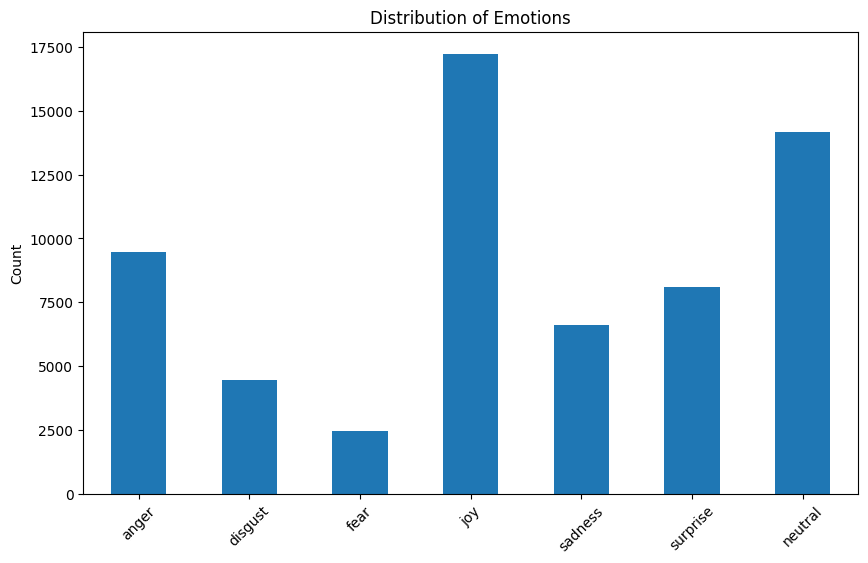

In [53]:
plot_distribution(result.drop_duplicates(), title="Distribution of Emotions")